Examination of the Petals and Sepals of Irises
Gabriel Richards
September 2024

My name is Gabriel Richards and this Jupyter notebook reviews a 150 row dataset, iris.csv. The file contains measurements of the petals and sepals for 3 different Iris species - 50 samples of each species. 

This notebook will examine the distributions of these measurements and variances between the species.

Definition of a Petal and Sepal

A petal is a colorful, often fragrant part of a flower that attracts pollinators such as bees and butterflies. Petals are typically located above the sepals and can vary greatly in size, shape, and color among different plant species.

A sepal is a leaf-like structure that forms the outermost "whorl" of a flower. It protects the developing flowerbud before it opens. Sepals are usually green and support the petals, contributing to the structure of the flower.


In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display, Markdown



# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

print(df.describe())


# Be sure you have INSTALLED any external packages (outside the Python Standard Library) into your active project virtual environment first.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Here is an excerpt of the top 5 rows of the data we will be examining. Additionally, here are some basic statistics about each column.

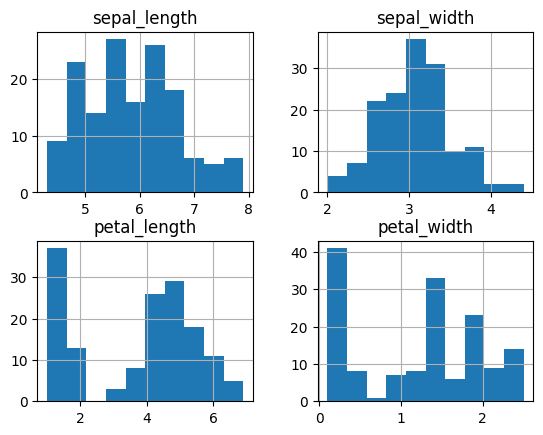

In [96]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

Here is a histogram of each numerical column in the CSV. In addition to these values, there is also a species column for each row.

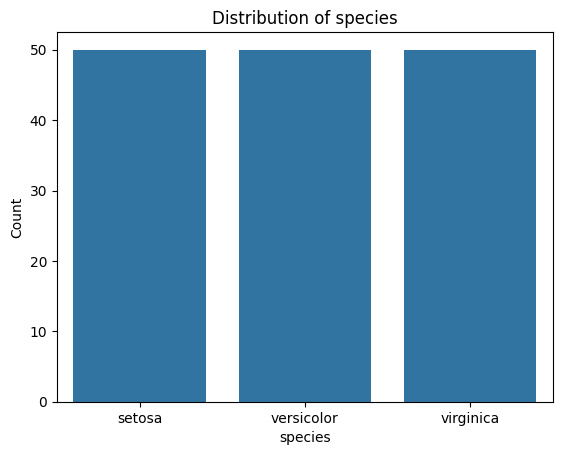

In [97]:

# Loop through each categorical column in the DataFrame
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot for the column
    sns.countplot(x=col, data=df)
    
    # Set title and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Show the plot for each column
    plt.show()

# This shows all the categorical columns count plots one by one

Here is a histogram of the species distribution in the CSV. There are 50 of each species - setosa, versicolor, and verginica.

In [98]:
'''Step 6. Initial Data Transformation and Feature Engineering

Use pandas and other tools to perform transformations as needed. 
Transformation may include renaming columns, adding new columns, 
or transforming existing data for more in-depth analysis.

Jupyter Notebook / Python cell example:'''

# Renaming column
df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)
df.rename(columns={'sepal_width': 'Sepal Width'}, inplace=True)
df.rename(columns={'petal_length': 'Petal Length'}, inplace=True)
df.rename(columns={'petal_width': 'Petal Width'}, inplace=True)



# Adding a new column
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']
df['Petal Area'] = df['Petal Length'] * df['Petal Width']



All 4 columns were refomatted to be more readable. Two new columns were calculated - Sepal Area and Petal Area. 

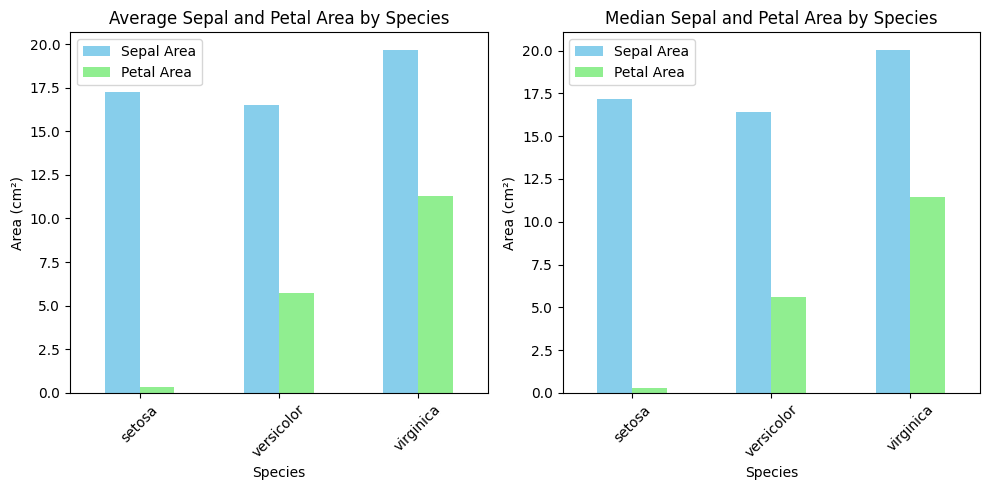

In [99]:
# Group by species to calculate average and median areas
mean_areas = df.groupby('species')[['Sepal Area', 'Petal Area']].mean()
median_areas = df.groupby('species')[['Sepal Area', 'Petal Area']].median()


# Plot average areas for each species
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
avg_areas.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen'])
plt.title('Average Sepal and Petal Area by Species')
plt.xlabel('Species')
plt.ylabel('Area (cm²)')
plt.xticks(rotation=45)

# Plot median areas for each species
plt.subplot(1, 2, 2)
median_areas.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen'])
plt.title('Median Sepal and Petal Area by Species')
plt.xlabel('Species')
plt.ylabel('Area (cm²)')
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Across all 3 species, the average Sepal Area is comparable, within 3 square centimeters. Petal area varies wildly. The Setosa species clearly tends to have very small petals, but has very typical Sepal areas to the other species.

We can see no major changes when when comparing the median and area of each species.

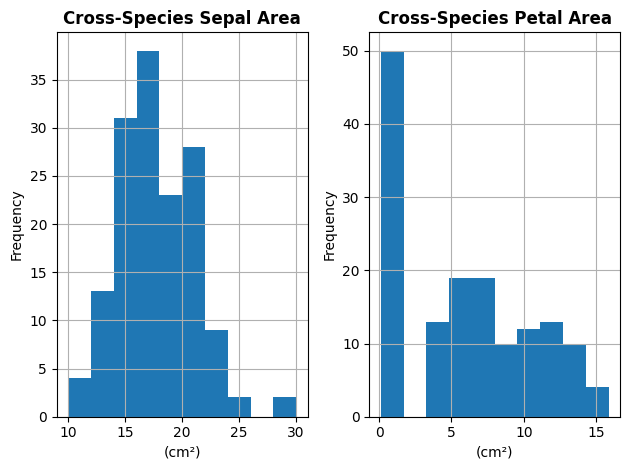

In [100]:
'''Step 7. Initial Visualizations

Create a variety of chart types using seaborn and matplotlib to showcase different aspects of the data. There is a guided example in the resources section at the end of this document.

Jupyter Notebook / Python cell example:
sns.pairplot(df, hue='species') 
plt.show()'''


# Inspect histograms only for 'Sepal Area' and 'Petal Area'
axes = df[['Sepal Area', 'Petal Area']].hist()

# Add axis labels and titles with appropriate units
titles = ['Cross-Species Sepal Area', 'Cross-Species Petal Area']
for ax, title, label in zip(axes.flatten(), titles, ['(cm²)', '(cm²)']):
    ax.set_title(title, fontweight='bold')  # Set title for each subplot
    ax.set_xlabel(label)                    # Set x-axis label
    ax.set_ylabel('Frequency')              # Set y-axis label


# Display the plot
plt.tight_layout()
plt.show()




The graph above examines the distributions of the cross-species areas for all 3 species in the 150 row sample.
The Cross-Species Sepal Area shows a very apparent Normal Distribution, or 'Bell-Curve'. 
The Cross-Species Petal Area however is harder to read, due to the high degree of outliers below ~2 cm².

In [101]:
# Calculate the number of values below 2 in the Petal Area column
petal_area_below_2_count = df[df['Petal Area'] < 2]['Petal Area'].count()

# Display the live count in markdown format
display(Markdown(f"**Count of Petal Area values below 2 cm²: {petal_area_below_2_count} rows**"))


# Calculate the total number of rows in the Petal Area column
total_petal_area_count = df['Petal Area'].count()
display(Markdown(f"**iris.csv total row count Area values below 2 cm²: {total_petal_area_count} rows**"))



# Percentage of rows below 2
percentage_below_2 = (petal_area_below_2_count / total_petal_area_count) * 100

display(Markdown(f"**Percentage of rows with Petal Area below 2 cm²: {percentage_below_2:.2f}%**"))


# Count of rows for the Setosa species
setosa_count = df[df['species'] == 'setosa'].shape[0]
display(Markdown(f"**Setosa count with Petal Area below 2 cm²: {setosa_count}**"))


**Count of Petal Area values below 2 cm²: 50 rows**

**iris.csv total row count Area values below 2 cm²: 150 rows**

**Percentage of rows with Petal Area below 2 cm²: 33.33%**

**Setosa count with Petal Area below 2 cm²: 50**

Reviewing Closer, all of 50 samples with Petal Areas below 2cm² are the Setosa Species. 

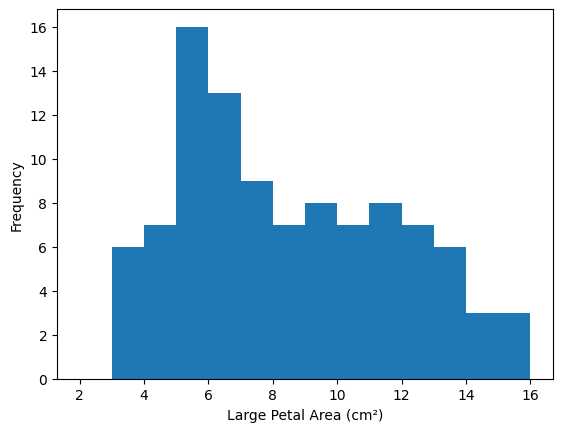

In [102]:



df['Over 2cm Petal Area'] = df['Petal Area'].where(df['Petal Area'] >= 2)

# Plot the histogram using plt
plt.hist(df['Over 2cm Petal Area'], bins=14, range=(2, 16))

# Add labels to the x and y axes
plt.xlabel('Large Petal Area (cm²)')
plt.ylabel('Frequency')

# Display the plot
plt.show()



Consider all Petal Areas over 2cm Large. We see those other 2 species, 
When removing the Setosa outliers below 2 centimeters squared from the Petal Area table, the Versicolor and Virginica species combined Petal Area average form yet another bell curve. Note with a slight bump with 29 rows between 5 and 7 cm².

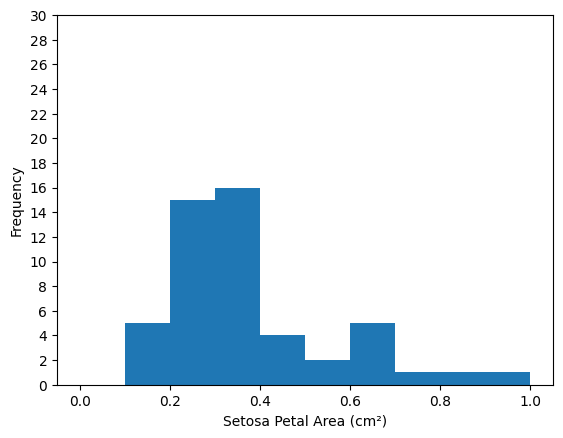

In [103]:
# Create a new column for petal area values <= 2
df['Sub-Two Petal Area'] = df['Petal Area'].where(df['Petal Area'] <= 2)

# Plot the histogram using plt
plt.hist(df['Sub-Two Petal Area'], bins=10, range=(0, 1))

# Add labels to the x and y axes
plt.xlabel('Setosa Petal Area (cm²)')
plt.ylabel('Frequency')

# Set y-axis ticks every 2 units
plt.yticks(range(0, int(df['Sub-Two Petal Area'].count()) + 2, 2))

# Set the maximum y-axis limit
plt.ylim(0, 30)

# Display the plot
plt.show()

While The Setosa species it self has a bell-ish distribution, it is heavily clustered 

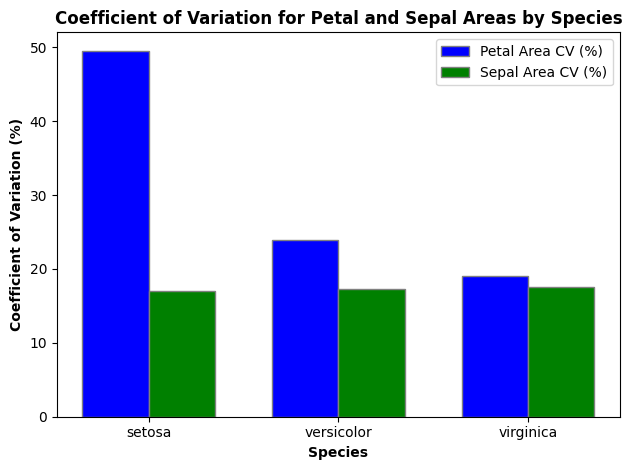

In [104]:

# Function to calculate Coefficient of Variation
def calculate_cv(series):
    return series.std() / series.mean() * 100  # Multiply by 100 to get percentage

# Calculate CV for each species
cv_data = {
    'Species': [],
    'Petal Area CV (%)': [],
    'Sepal Area CV (%)': []
}

for species in df['species'].unique():
    cv_data['Species'].append(species)
    cv_data['Petal Area CV (%)'].append(calculate_cv(df[df['species'] == species]['Petal Area']))
    cv_data['Sepal Area CV (%)'].append(calculate_cv(df[df['species'] == species]['Sepal Area']))

# Convert to DataFrame for easier plotting
cv_df = pd.DataFrame(cv_data)

# Set the bar width
bar_width = 0.35

# Set positions of bar on X axis
r1 = range(len(cv_df['Species']))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, cv_df['Petal Area CV (%)'], color='b', width=bar_width, edgecolor='grey', label='Petal Area CV (%)')
plt.bar(r2, cv_df['Sepal Area CV (%)'], color='g', width=bar_width, edgecolor='grey', label='Sepal Area CV (%)')

# Add labels and title
plt.xlabel('Species', fontweight='bold')
plt.ylabel('Coefficient of Variation (%)', fontweight='bold')
plt.title('Coefficient of Variation for Petal and Sepal Areas by Species', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(cv_df['Species']))], cv_df['Species'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

We can compare the coefficient of variation for each species to calculate which has the widest distribution.
A higher Coefficient of Variation means values in the set were less clustered, and the set had greater variance.
Comparing all 3 species, we can see while they all have consistent variance within their Sepal Area, 
This is despite the Setosa Petal Area values all being clustered below 1cm - a small bin compared to the interspecies distribution
While not provable within the scope of this exercise, I suspect this may be due to the difficulty in accurately measu